In [145]:
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# pd.options.plotting.backend = "plotly"

In [ ]:
conn = sqlite3.connect("mercadona.db")
query = """
SELECT avg([price_instructions.reference_price]) as [price_instructions.reference_price], l1, l1_name
FROM prices LEFT JOIN ids_categories
USING(id)
where [price_instructions.unit_name] is NULL
group by l1
"""
df = pd.read_sql(
        query,
        conn,
        # dtype={"id": str, "ymd": int, "price_instructions.reference_price": float},
    )
# ff.create_table(df)

In [38]:
import numpy as np
n_samples_per_group = 2
df.groupby('display_name').apply(lambda x: x.sample(min(len(x), n_samples_per_group))).reset_index(drop=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_5580\1643064708.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,display_name,price_instructions.unit_price,ymd
0,1/4 Sandía baja en semillas,3.65,20240424
1,1/4 Sandía baja en semillas,7.05,20240423
2,11 Panecillos,1.10,20240423
3,12 Mini croissants de mantequilla,1.85,20240423
4,12 Mini saladas,1.25,20240423
...,...,...,...
3474,Zumo de tomate Hacendado,1.05,20240423
3475,Zumo pura naranja Hacendado,1.75,20240423
3476,Zumo pura naranja Hacendado,2.80,20240423
3477,Zumo pura naranja con pulpa Hacendado,1.75,20240423


ValueError: Invalid color Botifarrón de carne

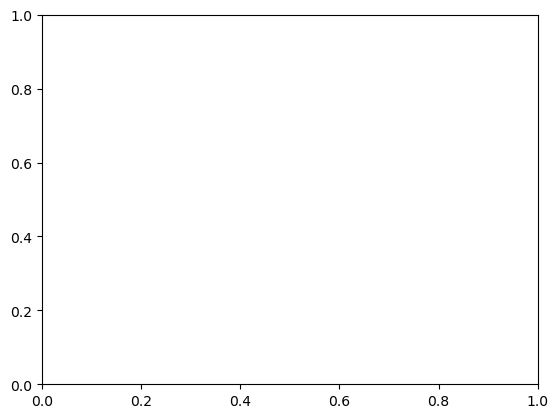

In [45]:
ax = df.plot.line(x="ymd", y="price_instructions.unit_price", marker="o", color=df['display_name'])
ax.set_xlabel("Date (ymd)")
ax.set_ylabel("Unit Price")
ax.set_title("Unit Price vs. Date")
plt.show()

In [107]:
pd.read_sql("""SELECT *
    FROM ids_categories
    group by id having count(id)>1 ;""", conn)

,id,ean,l1,l1_name,l2,l2_name,l3,l3_name,hash,ymd
0,1393.0,8.421610e+12,3,Carne,43,Embutido,286,Embutido,94282dfe6dd3012645f7b1e950ec9fef,20240423
1,1564.0,8.421384e+12,3,Carne,45,Empanados y elaborados,288,Empanados y elaborados,31a4bc1dddd58cbc0dafb7c1728640d8,20240423
2,1892.0,8.426460e+12,3,Carne,46,Arreglos,289,Arreglos,d3228ad72f8e20f82f9012c967b6edd6,20240423
3,1908.0,8.480000e+12,20,Cuidado facial y corporal,186,Higiene bucal,600,Cepillo de dientes,ac0d52336e321984a3afc8a0ea987838,20240423
4,1914.0,8.480000e+12,26,Limpieza y hogar,239,Pilas y bolsas de basura,781,Pilas,e78020465bf6b9c594e8ee0cfc918576,20240423
...,...,...,...,...,...,...,...,...,...,...
4799,90794.0,8.414580e+12,25,Mascotas,221,Perro,714,Aseo y cuidado,f513168dc27870253febf64cce09e34f,20240423
4800,90933.0,8.480001e+12,6,"Huevos, leche y mantequilla",75,Mantequilla y margarina,351,Mantequilla,eb0caf23601ce14d31c7a48963a3494c,20240423
4801,90947.0,6.950120e+12,25,Mascotas,222,Gato,718,Aseo y cuidado,0564f93bf823ebb046b2896adba477d7,20240423
4802,92998.0,8.424466e+12,5,Panadería y pastelería,59,Pan de horno,317,Pan de bocadillo,a44ea37eb44cc105a16053b98f6f7e64,20240423


In [140]:

df = pd.read_sql("""SELECT id, display_name, [price_instructions.unit_price], prices.ymd
    FROM prices LEFT JOIN products
    USING(id) LEFT JOIN ids_categories USING(id);""", conn).sort_values(by=['id']).drop_duplicates(subset=['id', 'ymd'])
df
# px.line(df, x="ymd", y="price_instructions.unit_price", color="display_name")
# lines = df.plot.line()
# df.set_index('display_name')[['ymd', 'price_instructions.unit_price']].plot()

# grouped_df = df.groupby('display_name')['price_instructions.unit_price'].mean()

# # Create a bar plot
# grouped_df.plot(kind='bar', figsize=(10, 6))
# plt.xlabel('Display Name')
# plt.ylabel('Unit Price')
# plt.title('Average Unit Price by Display Name')
# plt.show()

,id,display_name,price_instructions.unit_price,ymd
11408,1393.0,Botifarrón de carne,2.62,20240423
14187,1564.0,Costilla de cerdo ibérico adobada,3.43,20240423
6717,1892.0,Hueso blanco de cerdo salado,1.49,20240423
16625,1908.0,Recambios cepillo dental Eléctrico,3.85,20240423
16558,1914.0,Pila recargable AA Bosque Verde,7.90,20240423
...,...,...,...,...
16119,90794.0,Agua de colonia para perros y gatos Krislin,3.40,20240423
14012,90933.0,Mantequilla light Hacendado,2.10,20240423
11429,90947.0,Arena para gato de perlas sílice Single,3.55,20240423
13194,92998.0,Panecillo sin sal añadida,0.40,20240423


In [142]:
import pandas as pd

# Assuming your DataFrame is 'df' and the id column is 'id'
df = df.groupby('id').filter(lambda x: len(x) > 5)[['id', 'display_name', 'price_instructions.unit_price', 'ymd']]
df


,id,display_name,price_instructions.unit_price,ymd
19688,3076.0,Piña,3.36,20240503
21160,3076.0,Piña,3.27,20240508
17309,3076.0,Piña,3.61,20240424
18332,3076.0,Piña,3.71,20240428
13087,3076.0,Piña,3.57,20240423
...,...,...,...,...
20747,83692.5,Caballa Verdel abierta a la espalda con espina...,3.42,20240507
17311,83692.5,Caballa Verdel abierta a la espalda con espina...,2.03,20240424
18760,83692.5,Caballa Verdel abierta a la espalda con espina...,2.56,20240429
20618,83692.5,Caballa Verdel abierta a la espalda con espina...,2.92,20240504


In [159]:
df.groupby('id').filter(lambda x: len(x) > 2)[['id', 'display_name', 'price_instructions.unit_price', 'ymd', 'l3_name']].groupby('l3_name').mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [166]:
df = pd.read_sql("""SELECT id, display_name, [price_instructions.unit_price], prices.ymd, l1_name
    FROM prices LEFT JOIN products
    USING(id) LEFT JOIN ids_categories USING(id);""", conn).sort_values(by=['id']).drop_duplicates(subset=['id', 'ymd'])

# Assuming your DataFrame is 'df' and the id column is 'id'
df = df.groupby('id').filter(lambda x: len(x) > 2)[['id', 'display_name', 'price_instructions.unit_price', 'ymd', 'l1_name']]

# Convert 'ymd' column to datetime
df['ymd'] = pd.to_datetime(df['ymd'], format='%Y%m%d')

# Sort DataFrame by 'ymd'
df.sort_values(by='ymd', inplace=True)

# Group by 'l1_name' and 'ymd' and compute mean prices
grouped = df.groupby(['l1_name', 'ymd'])['price_instructions.unit_price'].mean().reset_index()

# Create traces for each group
fig = go.Figure()

for name, group in grouped.groupby('l1_name'):
    fig.add_trace(go.Scatter(x=group['ymd'],
                             y=group['price_instructions.unit_price'],
                             mode='lines+markers',
                             name=name))

# Add layout
fig.update_layout(title='Mean Price Fluctuation Over Time by Category',
                  xaxis_title='Date',
                  yaxis_title='Mean Price')

# Display plot
fig.show()

In [161]:
grouped

,l3_name,price_instructions.unit_price
0,Acondicionador,3.066667
1,Agua sin gas,2.305000
2,Anís,11.900000
3,Bacalao,20.403929
4,Bífidus naturales,3.733333
...,...,...
60,Sombra de ojos,7.000000
61,Tomate,0.855625
62,Trucha,7.722400
63,Tónica y bitter,2.027778


In [21]:
pd.read_sql(
      """SELECT 
    FROM prices LEFT JOIN products
    USING(id);""",
        conn,
    ).columns

Index(['id', 'ean', 'price_instructions.iva', 'price_instructions.is_new',
       'price_instructions.is_pack', 'price_instructions.pack_size',
       'price_instructions.unit_name', 'price_instructions.unit_size',
       'price_instructions.bulk_price', 'price_instructions.unit_price',
       'price_instructions.approx_size', 'price_instructions.size_format',
       'price_instructions.total_units', 'price_instructions.unit_selector',
       'price_instructions.bunch_selector',
       'price_instructions.drained_weight',
       'price_instructions.selling_method',
       'price_instructions.price_decreased',
       'price_instructions.reference_price',
       'price_instructions.min_bunch_amount',
       'price_instructions.reference_format',
       'price_instructions.previous_unit_price',
       'price_instructions.increment_bunch_amount', 'hash', 'ymd', 'ean',
       'slug', 'brand', 'badges.is_water', 'badges.requires_age_check',
       'origin', 'details.brand', 'details.origin',

In [6]:
query = """
    SELECT id, l1, l1_name, prices.ymd
    FROM prices LEFT JOIN ids_categories
    USING(id)
    WHERE l1 is NULL;
    """
df = pd.read_sql(
        query,
        conn,
    )
# fig = px.line(df, x="ymd", y="price_instructions.reference_price", color="id")

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['id', 'l1', 'l1_name', 'ymd'] but received: price_instructions.reference_price